# PCA runthrough
#### by Alvin Zhang
##### Notes and examples based on Bishop's "Pattern Recognition and Machine Learning"

## Standard PCA

PCA can be formulated in two ways: by maximum variance, and by minimum error. Both results give rise to the same solution.

### Maximum variance

Suppose we have a dataset of observations $\{\vec{x}_n\}$ for $n=1,...,N$ and $\vec{x}_n$ has dimensionality $D$, and suppose we wish to project this dataset down to a space with dimensionality $M<D$ by maximizing the variance of the projected data. First consider the base case $M=1$. This means we have a unit vector $\vec{u}_1$ so that $\vec{x}_n$ projects to $\vec{u}_1^T\vec{x}_n$. <br>
It follows that the mean of the projected data is
$$\vec{u}_1^T\bar{\vec{x}}$$
where $\bar{\vec{x}} = \frac{1}{N}\sum_{n=1}^N\vec{x}_n$. <br>
The variance of the projected data is
$$\frac{1}{N}\sum_{n=1}^N(\vec{u}_1^T\vec{x}_n-\vec{u}_1^T\bar{\vec{x}})^2=\vec{u}_1^T\mathbf{S}\vec{u}_1$$
where $\mathbf{S}=\frac{1}{N}\sum_{n=1}^N(\vec{x}_n-\bar{\vec{x}})(\vec{x}_n-\bar{\vec{x}})^T$.
The goal is to maximize the variance of the projected data w.r.t. $\vec{u}_1$ with the constraint that $\vec{u}_1$ is a unit vector. We introduce a Lagrange multiplier $\lambda_1$ so that the Lagrangian is
$$\vec{u}_1^T\mathbf{S}\vec{u}_1+\lambda_1(1-\vec{u}_1^T\vec{u}_1)$$
Finding the critical point w.r.t. $\vec{u}_1$ leads to
$$\mathbf{S}\vec{u}_1=\lambda_1\vec{u}_1\Rightarrow\vec{u}_1\text{ is an eigenvector of }\mathbf{S}$$
$$\Rightarrow\vec{u}_1^T\mathbf{S}\vec{u}_1=\lambda_1\Rightarrow\text{Maximized when }\vec{u}_1 \text{ is set to the eigenvector having the largest eigenvalue }\lambda_1$$
For $M>1$, we can inductively add new components such that the next principal component is an eigenvector orthogonal to the first $M-1$ eigenvector with the largest eigenvalue.

### Minimum error

Suppose again we have a dataset of observations $\{\vec{x}_n\}$ for $n=1,...,N$ and $\vec{x}_n$ has dimensionality $D$. We introduce a complete orthonormal set of $D$-dimensional basis vectors $\{\vec{u}_i\}$ for $i=1,...,D$. <br>
Each data point can be represented by a linear combination of basis vectors since the basis is complete:
$$\vec{x}_n=\sum_{i=1}^D\alpha_{ni}\vec{u}_i$$
This corresponds to a rotation of the coordinate system defined by $\{\vec{u}_i\}$. <br>
Note that
$$\vec{x}_n\cdot\vec{u}_j=\sum_{i=1}^D\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)=\sum_{i=1}^{j-1}\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)+\sum_{i=j+1}^D\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)+\alpha_{nj}(\vec{u}_j\cdot\vec{u}_j)$$
$$\Rightarrow\alpha_{nj}=\vec{x}_n\cdot\vec{u}_j=\vec{x}_n^T\vec{u}_j$$
Back-substituting this into the data point representation, we get
$$\vec{x}_n=\sum_{i=1}^D(\vec{x}_N^T\vec{u}_i)\vec{u}_i$$
Our goal is to approximate this data point using $M<D$ variables so that
$$\tilde{\vec{x}_n}=\sum_{i=1}^Mz_{ni}\vec{u}_i+\sum_{i=M+1}^Db_i\vec{u}_i$$
where $\{z_{ni}\}$ depend on each data point and $\{b_i\}$ are constants for all data points. <br>
The cost function is then 
$$J=\frac{1}{N}\sum_{n=1}^N\Vert\vec{x}_n-\tilde{\vec{x}}_n\Vert^2$$
Finding the critical point w.r.t. $\{z_{ni}\}$, we get $z_{nj}=\vec{x}_n^T\vec{u}_j$ for $j=1,...,M$. <br>
Finding the critical point w.r.t. $\{b_i\}$, we get $b_j=\bar{\vec{x}}^T\vec{u}_j$ for $j=M+1,...,D$. <br>
Substituting these values in and using $\vec{x}_n=\sum_{i=1}^D(\vec{x}_N^T\vec{u}_i)\vec{u}_i$, we get
$$\vec{x}_n-\tilde{\vec{x}_n}=\sum_{i=M+1}^D\{(\vec{x}_n-\bar{\vec{x}})^T\vec{u}_i\}\vec{u}_i$$
Substituting this into $J$, we get
$$J=\frac{1}{N}=\sum_{n=1}^N\sum_{i=M+1}^D(\vec{x}_n^T\vec{u}_i-\bar{\vec{x}}^T\vec{u}_i)^2=\sum_{i=M+1}^D\vec{u}_i^T\mathbf{S}\vec{u}_i$$
where $\mathbf{S}$ is the data covariance as given above. With similar reasoning as above, in this case we choose the components from $M+1,...,D$ to be the eigenvectors with the smallest eigenvalues in order to minimize $J$. This leaves the principal components $1,...,M$ to be the eigenvectors with the largest eigenvalues.

## Applications

### Dimensionality reduction

We're going to reduce 2D data to 1D data for easy visualization, but normally we work with much higher dimensional datasets. <br> Suppose we have the following data:

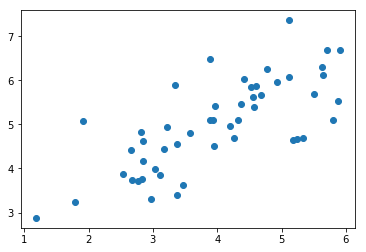

In [1]:
import numpy as np
from matplotlib import pyplot as plt

file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set7X.csv'
X = np.loadtxt(file_name_X, delimiter=',')
plt.plot(X[:, [0]], X[:, [1]], 'o')
plt.show()

The PCA object is defined as follows:

In [2]:
class PCA:
    def __init__(self, X):
        """
        Initializes PCA object.
        Args:
            X (float ndarray): dataset
        """
        self.X = X
        self.N, self.D = self.X.shape[0], self.X.shape[1]
        self.mean = np.average(self.X, axis=0).reshape(-1, 1)
        self.cov = (self.X - self.mean.T).T.dot(self.X - self.mean.T) / self.N
        self.eiglist = None
        self.U = None

    def fit(self):
        """
        Computes components for model.
        Returns:
            eiglist (tuple list): list of (eigenvalue, eigenvector) in descending order
        """
        evals, evecs = np.linalg.eig(self.cov)
        self.eiglist = [(evals[i], evecs[:, i]) for i in range(len(evals))]
        self.eiglist.sort(key=lambda x: x[0], reverse=True)
        return self.eiglist

    def transform(self, M):
        """
        Computes components for model.
        Args:
            M (int): number of dimensions to project to
        Returns:
            reduced (ndarray): input reduced down to M dimensions
            recovered (ndarray): `reduced` projected back to D-dimensional space
        """
        assert self.eiglist is not None, 'Need to fit first.'
        self.U = np.zeros((self.D, M))
        for i in range(M):
            self.U[:, [i]] = self.eiglist[i][1].reshape(-1, 1)
        reduced = self.X.dot(self.U) - self.mean.T.dot(self.U)
        recovered = self.mean.T + reduced.dot(self.U.T)
        return reduced, recovered


The components are plotted below:

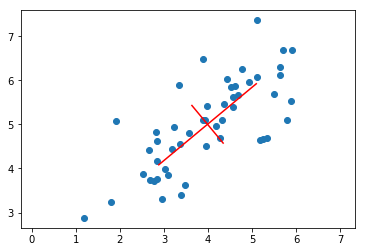

In [3]:
def plot_pca_2D(fig, X, eiglist):
    """
    Plots PCA data.
    Args:
        fig (figure): figure to plot on
        X (float ndarray): x values to plot
        eiglist (tuple list): list of (eigenvalue, eigenvector) in descending order
    """
    eval1, eval2 = eiglist[0][0], eiglist[1][0]
    evec1, evec2 = eiglist[0][1], eiglist[1][1]
    mean = np.average(X, axis=0)
    plt.axis('equal')
    plt.plot(X[:, [0]], X[:, [1]], 'o')
    eig1_plt = np.vstack([mean - eval1**0.5 * evec1, mean + eval1**0.5 * evec1])
    eig2_plt = np.vstack([mean - eval2**0.5 * evec2, mean + eval2**0.5 * evec2])
    plt.plot(eig1_plt[:, [0]], eig1_plt[:, [1]], 'r')
    plt.plot(eig2_plt[:, [0]], eig2_plt[:, [1]], 'r')

pca = PCA(X)
eiglist = pca.fit()

# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()


The reduced dataset and projected dataset are plotted respectively:

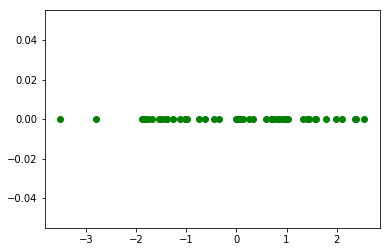

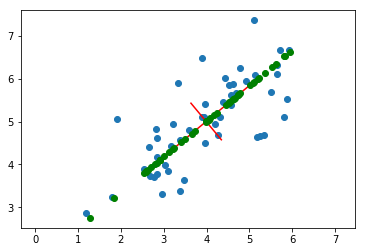

In [4]:
M = 1
reduced, recovered = pca.transform(M)

plt.plot(reduced, np.zeros(reduced.shape), 'go')
plt.show()

plot_pca_2D(plt, X, eiglist)
plt.plot(recovered[:, [0]], recovered[:, [1]], 'go')
plt.show()

### Data visualization

Suppose we have the following 3D dataset obtained from K-means clustering on an image. We'd like to visualize the colors in 2D space instead of 3D RGB space.

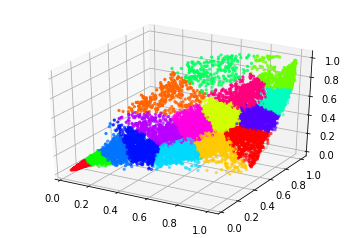

In [5]:
from mpl_toolkits.mplot3d import Axes3D

file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set8X.csv'
file_name_t = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set8t.csv'
X = np.loadtxt(file_name_X, delimiter=',')
t = np.loadtxt(file_name_t, delimiter=',').astype(np.int32)

color_map = plt.cm.get_cmap('hsv', len(np.unique(t)))
colors = [color_map(i) for i in t]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,[0]], X[:,[1]], X[:,[2]], c=colors, marker='.')
plt.show()

Here is the data reduced down to 2 dimensions for better visualization. This is the rotation with the view that best maximizes the spread of the data.

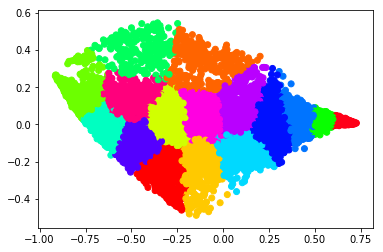

In [6]:
pca = PCA(X)
pca.fit()
M = 2
reduced, recovered = pca.transform(M)

plt.scatter(reduced[:,[0]], reduced[:,[1]], c=colors)
plt.show()

### Whitening

Typically, we want to preprocess data by standardizing it. Typically, we can linearly rescale each variable so that each variable has zero mean and unit variance. However, whitening using PCA gives us a better decorrelation. Consider the eigenvector equation in the form
$$\mathbf{S}\mathbf{U}=\mathbf{L}\mathbf{U}$$
where $\mathbf{L}$ is a $D\times D$ diagonal matrix with elements $\lambda_i$ and $\mathbf{U}$ is a $D\times D$ orthogonal matrix with columns given by $\vec{u}_i$. <br>
For each data point $\vec{x}_n$, we can transform it so that
$$\vec{y}_n=\mathbf{L}^{-\frac{1}{2}}\mathbf{U}^T(\vec{x}_n-\bar{\vec{x}})$$
where $\bar{\vec{x}}$ is the sample mean.
Note that $\{\vec{y}_n\}$ has zero mean since we have subtracted the original mean from each original data point, and note that it has unit covariance since
$$\frac{1}{N}\sum_{n=1}^N\vec{y}_n\vec{y}_n^T=\frac{1}{N}\sum_{n=1}^N\mathbf{L}^{-\frac{1}{2}}\mathbf{U}^T(\vec{x}_n-\bar{\vec{x}})(\vec{x}_n-\bar{\vec{x}})^T\mathbf{U}\mathbf{L}^{-\frac{1}{2}}$$
$$=\mathbf{L}^{-\frac{1}{2}}\mathbf{U}^T\mathbf{S}\mathbf{U}\mathbf{L}^{-\frac{1}{2}}=\mathbf{L}^{-\frac{1}{2}}\mathbf{L}\mathbf{L}^{-\frac{1}{2}}=\mathbf{I}$$
The data set used in multiclass classfication is whitened below:

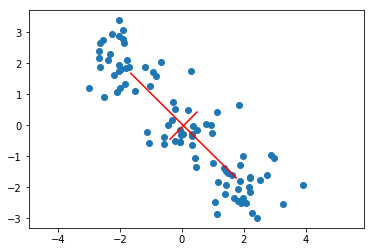

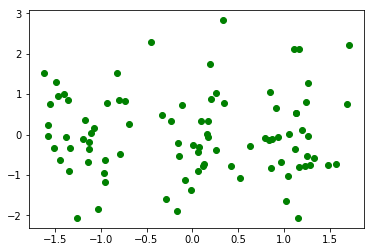

In [7]:
class PCA_whiten(PCA):
    def whiten(self):
        """
        Whitens data so that projected data has zero mean and unit covariance.
        Returns:
            projs (ndarray): whitened data for `self.X`
        """
        assert self.eiglist is not None, 'Need to fit first.'
        U = np.zeros((self.D, self.D))
        for i in range(self.D):
            U[:, [i]] = self.eiglist[i][1].reshape(-1, 1)
        L = np.diag([self.eiglist[i][0] for i in range(self.D)])
        projs = (self.X - self.mean.T).dot((np.linalg.pinv(np.sqrt(L)).dot(U.T)).T)
        return projs


file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set2X.csv'
X = np.loadtxt(file_name_X, delimiter=',')
pca = PCA_whiten(X)
eiglist = pca.fit()
projs = pca.whiten()

# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()

# Plot projected points
plt.plot(projs[:, [0]], projs[:, [1]], 'go')
plt.show()


Here is another example with just two classes.

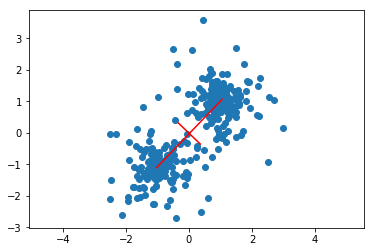

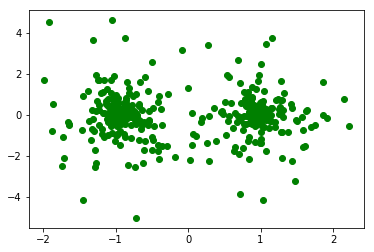

In [8]:
file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set9X.csv'
X = np.loadtxt(file_name_X, delimiter=',')
pca = PCA_whiten(X)
eiglist = pca.fit()
projs = pca.whiten()

# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()

# Plot projected points
plt.plot(projs[:, [0]], projs[:, [1]], 'go')
plt.show()

## Probabilistic PCA

We now turn to a probabilistic formulation of PCA. This formulation has many advantages, which include deriving an efficient EM algorithm for PCA, a Bayesian treatment, and ability to deal with missing values. <br>
We define a Gaussian prior over the latent variable $\vec{z}$ with zero mean and unit covariance so that
$$p(\vec{z})=\mathcal{N}(\vec{z}|\vec{0},\mathbf{I})$$
The conditional distribution is then given by
$$p(\vec{x}|\vec{z})=\mathcal{N}(\vec{x}|\mathbf{W}\vec{z}+\vec{\mu},\sigma^2\mathbf{I})$$
where $\mathbf{W}$ is a $D\times M$ matrix and $\mu$ is a $D$-dimensional vector. Note this is an example of naive Bayes since this factorizes w.r.t. elements of $\vec{x}$. Also note that this conditional can be viewed from a generative viewpoint: $\vec{x}=\mathbf{W}\vec{z}+\vec{\mu}+\epsilon$, where $\epsilon$ is noise with zero mean and covariance $\sigma^2\mathbf{I}$. <br> <br>
$p(\vec{x})$ can be found by marginalizing;
$$p(\vec{x})=\int p(\vec{x}|\vec{z})p(\vec{z})d\vec{z}$$
$$\Rightarrow p(\vec{x})=\mathcal{N}(\vec{x}|\vec{\mu},\mathbf{C})$$
where $\mathbf{C}=\mathbf{W}\mathbf{W}^T+\sigma^2\mathbf{I}$. <br>
We will later have to invert $\mathbf{C}$, a $D\times D$ matrix. However, we can make use of an identity so we only have to invert a $M\times M$ matrix:
$$\mathbf{C}^{-1}=\sigma^{-2}\mathbf{I}-\sigma^{-2}\mathbf{W}\mathbf{M}^{-1}\mathbf{W}^T$$
where $\mathbf{M}=\mathbf{W}^T\mathbf{W}+\sigma^2\mathbf{I}$. <br>
Finally, the posterior is given by
$$p(\vec{z}|\vec{x})=\mathcal{N}(\vec{z}|\mathbf{M}^{-1}\mathbf{W}^T(\vec{x}-\vec{\mu}), \sigma^{-2}\mathbf{M}^{-1})$$
where we have used the results from 2.3.3. <br><br>
Now if we are given a dataset $\mathbf{X}$, we can attempt to maximize the log likelihood function, which from using the conditional above is given by
$$\log{p(\mathbf{X}|\vec{\mu}, \mathbf{W}, \sigma^2)} = \sum_{n=1}^N\log{p(\vec{x}_n|\mathbf{W}, \vec{\mu}, \sigma^2)}=-\frac{ND}{2}\log{2\pi}-\frac{N}{2}\log{|\mathbf{C}|}-\frac{1}{2}\sum_{n=1}^N(\vec{x}_n-\vec{\mu})^T\mathbf{C}^{-1}(\vec{x}_n-\vec{\mu})$$
If we find the critical point w.r.t. $\vec{\mu}$, we obtain the expected result that $\vec{\mu}=\bar{\vec{x}}$. Substituting this back into the log likelihood simplifies it a bit, as we now have
$$\log{p(\mathbf{X}|\mathbf{W},\vec{\mu},\sigma^2)}=-\frac{N}{2}(D\log{(2\pi)}+\log{|\mathbf{C}|}+\text{Tr}(\mathbf{C}^{-1}\mathbf{S}))$$
Finding the critical point w.r.t. $\mathbf{W}$ and $\sigma^2$ is more complex and explored in Tipping and Bishop (1999). The closed-form solution is as follows:
$$\mathbf{W}_{ML}=\mathbf{U}_M(\mathbf{L}_M-\sigma^2\mathbf{I})^{\frac{1}{2}}\mathbf{R}$$
where $\mathbf{U}_M$ is a $D\times M$ matrix with eigenvector columns (of $\mathbf{S}$), $\mathbf{L}_M$ is a $M\times M$ diagonal matrix with corresponding eigenvalues, and $\mathbf{R}$ is an arbitrary $M\times M$ orthogonal matrix. The maximum is obtained when the columns of $\mathbf{U}_M$ are the $M$ largest eigenvectors.
$$\sigma^2_{ML}=\frac{1}{D-M}\sum_{i=M+1}^D\lambda_i$$
where $\lambda_i$ are eigenvalues of the discarded eigenvectors (we sorted them from largest to smallest). <br><br>
Once we have $\mathbf{W}_ML$ and $\sigma^2_{ML}$, we can calculate the posterior mean and variance for any data point $\vec{x}$, which are given by
$$\mathbb{E}[\vec{z}|\vec{x}]=\mathbf{M}^{-1}\mathbf{W}^T_{ML}(\vec{x}-\bar{\vec{x}})$$
$$\text{var}[\vec{z}|\vec{x}]=\sigma^2\mathbf{M}^{-1} \text{(independent of } \vec{x} \text{)}$$
Recall our generative perspective; we can project back to the original data space with
$$\mathbf{W}\mathbb{E}[\vec{z}|\vec{x}]+\vec{\mu}$$
<br>
The projection is show below in green points using the same data used in dimensionality reduction with standard PCA:

In [9]:
class PPCA(PCA):
    def _ml(self, M):
        """
        Calculates maximum likelihood solution for W and var.
        Args:
            M (int): number of dimensions to project to
        Returns:
            W_ML (ndarray): MLE of W (D x M array)
            var_ML (float): MLE of variance
            ll (float): value of maximum log likelihood
        """
        assert self.eiglist is not None, 'Need to fit first.'
        var_ML = 1 / (self.D - M) * sum(self.eiglist[i][0] for i in range(-(self.D - M), 0))
        self.U = np.zeros((self.D, M))
        for i in range(M):
            self.U[:, [i]] = self.eiglist[i][1].reshape(-1, 1)
        L = np.diag(np.asarray([self.eiglist[i][0] for i in range(M)]))
        R = np.identity(M)
        W_ML = self.U.dot(np.sqrt(L - var_ML * np.identity(M))).dot(R)
        C = W_ML.dot(W_ML.T) + var_ML * np.identity(self.D)
        C_inv = 1 / var_ML * np.identity(W_ML.shape[0]) - \
                1 / var_ML * W_ML.dot(np.linalg.pinv(W_ML.T.dot(W_ML)
                                                     + var_ML * np.identity(M))).dot(W_ML.T)
        ll = -self.N / 2 * (self.D * np.log(2 * np.pi) + np.log(np.linalg.det(C)) +
                                       np.trace(C_inv.dot(self.cov)))
        return W_ML, var_ML, ll

    def transform_ml(self, M):
        """
        Computes posterior parameters for model using maximum likelihood.
        Args:
            M (int): number of dimensions to project to
        Returns:
            recovered (ndarray): posterior means projected back to D-dimensional space
        """
        W_ML, var_ML, max_ll = self._ml(M)
        # var_ML = 0  # standard pca
        posterior_mean = (self.X - self.mean.T).dot((np.linalg.pinv(W_ML.T.dot(W_ML)
                                          + var_ML * np.identity(M)).dot(W_ML.T)).T)
        posterior_cov = var_ML * (np.linalg.pinv(W_ML.T.dot(W_ML)
                                                 + var_ML * np.identity(M)).dot(W_ML.T))
        recovered = posterior_mean.dot(W_ML.T) + self.mean.T
        return recovered


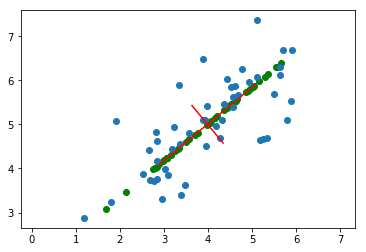

In [10]:
file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set7X.csv'
X = np.loadtxt(file_name_X, delimiter=',')

pca = PPCA(X)
eiglist = pca.fit()
M = 1
projs = pca.transform_ml(M)

# Plot projected points
plt.plot(projs[:, [0]], projs[:, [1]], 'go')
# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()

Note that if we take the limit $\sigma^2\rightarrow 0$, we obtain standard PCA.

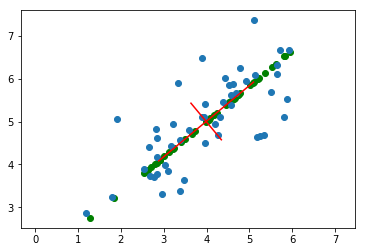

In [11]:
class PPCA_0var(PPCA):
    def transform_ml(self, M):
        """
        Computes posterior parameters for model.
        Args:
            M (int): number of dimensions to project to
        Returns:
            recovered (ndarray): posterior means projected back to D-dimensional space
        """
        W_ML, var_ML, max_ll = self._ml(M)
        # var -> 0:
        var_ML = 0
        posterior_mean = (X - pca.mean.T).dot((np.linalg.pinv(W_ML.T.dot(W_ML)
                                          + var_ML * np.identity(M)).dot(W_ML.T)).T)
        recovered = posterior_mean.dot(W_ML.T) + self.mean.T
        return recovered


file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set7X.csv'
X = np.loadtxt(file_name_X, delimiter=',')

pca = PPCA_0var(X)
eiglist = pca.fit()
M = 1
projs = pca.transform_ml(M)

# Plot projected points
plt.plot(projs[:, [0]], projs[:, [1]], 'go')
# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()


### EM algorithm for probabilistic PCA

Even though we have a closed form solution for the probabilistic formulation of PCA, we can still apply EM for computational benefits and cases where there is missing data. <br>
The complete data log likelihood function is given by 
$$\log{p(\mathbf{X}, \mathbf{Z}|\vec{\mu}, \mathbf{W}, \sigma^2)}=\sum_{n=1}^N(\log{p(\vec{x}_n|\vec{z}_n)}+\log{p(\vec{z}_n)})$$
The expectation of this is
$$\mathbb{E}[\log{p(\mathbf{X}, \mathbf{Z}|\vec{\mu}, \mathbf{W}, \sigma^2)}]=-\sum_{n=1}^N\left(\frac{D}{2}\log{2\pi\sigma^2}+\frac{1}{2}\text{Tr}(\mathbb{E}[\vec{z}_n\vec{z}_n^T])+\frac{1}{2\sigma^2}\Vert\vec{x}_n-\vec{\mu}\Vert^2-\frac{1}{\sigma^2}\mathbb{E}[\vec{z}_n]^T\mathbf{W}^T(\vec{x}_n-\vec{\mu})+\frac{1}{2\sigma^2}\text{Tr}(\mathbb{E}[\vec{z}_n\vec{z}_n^T]\mathbf{W}^T\mathbf{W})\right)$$
Since this only depends on the posterior through the sufficient statistics (first-order and second-order moments), in the E-step we evaluate
$$\mathbb{E}[\vec{z}_n]=\mathbf{M}^{-1}\mathbf{W}^T(\vec{x}_n-\bar{\vec{x}})$$
$$\mathbb{E}[\vec{z}_n\vec{z}_n^T]=\sigma^2\mathbf{M}^{-1}+\mathbb{E}[\vec{z}_n]\mathbb{E}[\vec{z}_n]^T$$
In the M-step, we maximize the complete-data log likelihood w.r.t. $\mathbf{W}$ and $\sigma^2$ while keeping the posterior statistics fixed. We obtain the following update equations:
$$\mathbf{W}_{\text{new}}=\left(\sum_{n=1}^N(\vec{x}_n-\bar{\vec{x}})\mathbb[\vec{z}_n]^T\right)\left(\sum_{n=1}^N\mathbb{E}[\vec{z}_n\vec{z}_n^T]\right)^{-1}$$
$$\sigma^2_{\text{new}}=\frac{1}{ND}\sum_{n=1}^N\left(\Vert\vec{x}_n-\bar{\vec{x}}\Vert^2-2\mathbb{E}[\vec{z}_n]^T\mathbf{W}^T_{\text{new}}(\vec{x}_n-\bar{\vec{x}})+\text{Tr}(\mathbb{E}[\vec{z}_n\vec{z}_n^T]\mathbf{W}^T_{\text{new}}\mathbf{W}_{\text{new}})\right)$$
We could easily adapt this to online learning as well by considering one data point at a time. Also as before, the limit $\sigma^2\rightarrow0$ results in standard PCA.

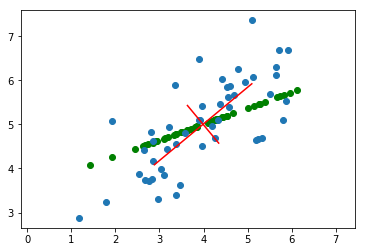

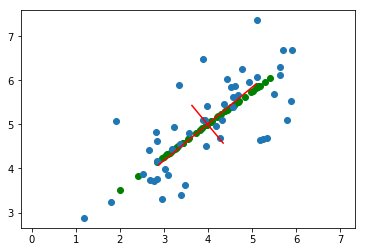

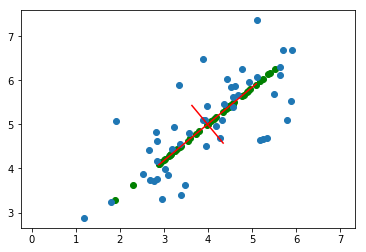

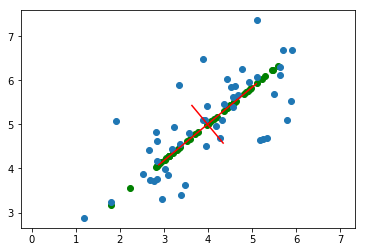

In [12]:
class PPCA_em(PPCA):
    def transform_em(self, M, maxiter=10, plot=False):
        """
        Computes posterior parameters for model using EM algorithm.
        Args:
            M (int): number of dimensions to project to
            maxiter (int): maximum number of iterations
        Returns:
            recovered (ndarray): posterior means projected back to D-dimensional space
        """
        W = np.random.randn(self.D, M)
        var = 0.01
        for _ in range(maxiter):
            # E step
            moment_1 = (self.X - self.mean.T).dot((np.linalg.pinv(W.T.dot(W) + var * np.identity(M)).dot(W.T)).T)
            moment_2 = [var * np.linalg.pinv(W.T.dot(W) + var * np.identity(M)) \
                        + moment_1[i].reshape(-1, 1).dot(moment_1[i].reshape(1, -1))
                        for i in range(self.N)]
            # M step
            W = (self.X - self.mean.T).T.dot(moment_1).dot(np.linalg.inv(sum(moment_2)))
            var = 1 / (self.N * self.D) * sum(np.linalg.norm(self.X[i].reshape(-1, 1) - self.mean) ** 2 -
                                              2 * moment_1[i].reshape(1, -1).dot(W.T).dot(
                                              self.X[i].reshape(-1, 1) - self.mean) +
                                              np.trace(moment_2[i].dot(W.T).dot(W))
                                              for i in range(self.N))
            # Plot
            if plot:
                recovered = moment_1.dot(W.T) + self.mean.T
                plt.plot(recovered[:, [0]], recovered[:, [1]], 'go')
                plot_pca_2D(plt, self.X, self.eiglist)
                plt.show()
        recovered = moment_1.dot(W.T) + self.mean.T
        return recovered


# EM algorithm (PPCA)
file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set7X.csv'
X = np.loadtxt(file_name_X, delimiter=',')
M = 1
pca = PPCA_em(X)
pca.fit()
recovered = pca.transform_em(M, maxiter=4, plot=True)


### Bayesian PCA

A Bayesian treatment can be applied to our probabilistic formulation of PCA by marginalizing out model parameters $\vec{\mu}, \mathbf{W}, \sigma^2$ w.r.t. appropriate priors. We're only going to be marginalizing $\mathbf{W}$ right now. We approach this using a method based on evidence approximation and automatic relevance determination. Each column of $\mathbf{W}$ has a Gaussian prior so that
$$p(\mathbf{W}|\alpha)=\prod_{i=1}^M\left(\frac{\alpha_i}{2\pi}\right)e^{-\frac{1}{2}\alpha_i\vec{w}_i^T\vec{w}_i}$$
where $\vec{w}_i$ is the $i^{\text{th}}$ column of $\mathbf{W}$.<br>
$\alpha_i$ can be found iteratively by maximizing the marginal likelihood where $\mathbf{W}$ has been integrated out, which is
$$p(\mathbf{X}|\vec{\alpha},\vec{\mu},\sigma^2)=\int p(\mathbf{X}|\mathbf{W},\vec{\mu},\sigma^2)p(\mathbf{W}|\alpha)d\mathbf{W}$$
where $p(\mathbf{X}|\mathbf{W},\vec{\mu},\sigma^2)$ is given above in the maximum likelihood formulation of probabilistic PCA. <br>
Since this integral is intractable, we use the Laplace approximation to obtain the re-estimation equation
$$\alpha_i^{\text{new}}=\frac{D}{\vec{w}_i^T\vec{w}_i}$$
which was derived in hyperparameter optimization in linear regression. <br>
These re-estimation equations can be embedded into the ME algorithm. The E step equations are the same, and the M step equation for variance is the same, but we obtain a new update equation for $\mathbf{W}$:
$$\mathbf{W}_{\text{new}}=\left(\sum_{n=1}^N(\vec{x}_n-\bar{\vec{x}})\mathbb[\vec{z}_n]^T\right)\left(\sum_{n=1}^N\mathbb{E}[\vec{z}_n\vec{z}_n^T]\right)^{-1}+\sigma^2\mathbf{A}$$
where $\mathbf{A}=\text{diag}(\alpha_i)$.<br>
Note that this effectively determines a suitable value of $M$; $M$ is given by the number of finite values of $\alpha_i$, since those driven to infinity will have a column value of zero.

In [13]:
def _find_M(self, M=None, maxiter=100):
    """
    Finds a suitable M for the data using a Bayesian framework.
    Args:
        maxiter (int): maximum number of iterations
    Returns:
        M (int): suitable M for the dataset
    """
    if M is None: M = self.D - 1
    alphas = np.abs(np.random.randn(M))
    W = np.random.randn(self.D, M)
    var = 0.01
    for _ in range(maxiter):
        moment_1 = (self.X - self.mean.T).dot((np.linalg.pinv(W.T.dot(W) + var * np.identity(M)).dot(W.T)).T)
        moment_2 = [var * np.linalg.pinv(W.T.dot(W) + var * np.identity(M)) \
                    + moment_1[i].reshape(-1, 1).dot(moment_1[i].reshape(1, -1))
                    for i in range(self.N)]
        alphas = np.asarray([self.D/(W[:, [i]].T.dot(W[:, [i]]))[0][0] for i in range(self.D-1)])
        alphas[alphas > 1e5] = 1e5
        A = np.diag(alphas)
        W = (self.X - self.mean.T).T.dot(moment_1).dot(np.linalg.inv(sum(moment_2) + var*A))
        var = 1 / (self.N * self.D) * sum(np.linalg.norm(self.X[i].reshape(-1, 1) - self.mean) ** 2 -
                                          2 * moment_1[i].reshape(1, -1).dot(W.T).dot(
                                          self.X[i].reshape(-1, 1) - self.mean) +
                                          np.trace(moment_2[i].dot(W.T).dot(W))
                                          for i in range(self.N))
    M = len(alphas[alphas < 1e5])
    return M


## Kernel PCA

We can apply the knerel trick to PCA. Suppose we have a dataset $\{\vec{x}_n\}$ of observations for $n=1,...,N$ with dimensionality $D$. Further suppose the mean is zero (subtract off original mean from each data point). The principal components are defined by eigenvectors $\vec{u}_i$ of the data covariance $\mathbf{S}$ as defined above. If we have a nonlinear transformation $\vec{\phi}(\vec{x})$ into $M$ dimensional space, our covariance becomes $$\mathbf{C}=\frac{1}{N}\sum_{n=1}^N\vec{\phi}(\vec{x}_n)\vec{\phi}(\vec{x}_n)^T$$
This means our eignevector problem becomes
$$\mathbf{C}\vec{v}_i=\lambda_i\vec{v}_i$$
for $i=1,...,M$. <br>
We want to solve this without working explicitly in the feature space. Not that the eigenvectors of the feature space $\vec{v}_i$ can be written as a linear combination of $\vec{\phi}(\vec{x}_n)$ as 
$$\vec{v}_i=\sum_{n=1}^Na_{in}\vec{\phi}(\vec{x}_n)$$
since 
$$\mathbf{C}\vec{v}_i=\lambda_i\vec{v}_i=\frac{1}{N}\sum_{n=1}^N\vec{\phi}(\vec{x}_n)\left(\vec{\phi}(\vec{x}_n)^T\vec{v}_i\right)$$
If we backsubstitute this into the eigenvector equation, we get
$$\frac{1}{N}\sum_{n=1}^N\vec{\phi}(\vec{x}_n)\vec{\phi}(\vec{x}_n)^T \sum_{m=1}^Na_{im}\vec{\phi}(\vec{x}_m)=\lambda_i\sum_{n=1}^Na_{in}\vec{\phi}(\vec{x}_n)$$
Since we're trying to express everything in terms of the kernel function $k(\vec{x}_n,\vec{x}_m)=\vec{\phi}(\vec{x}_n)^T\vec{\phi}(\vec{x}_m)$, we multiply each side by $\vec{\phi}(\vec{x}_l)^T$ to obtain
$$\frac{1}{N}\sum_{n=1}^Nk(\vec{x}_l,\vec{x}_n)\sum_{n=1}^Na_{im}k(\vec{x}_n,\vec{x}_m)=\lambda_i\sum_{n=1}^Na_{in}k(\vec{x}_l,\vec{x}_n)$$
We can express this with Gram matrices:
$$\mathbf{K}^2\vec{a}_i=\lambda_iN\mathbf{K}\vec{a}_i$$
$$\Rightarrow \mathbf{K}\vec{a}_i=\lambda_iN\vec{a}_i$$
since we discount eigenvectors of $\mathbf{K}$ with eigenvalues zero.
We can solve this eigenvector problem and then normalize the $\vec{a}_i$ with
$$1=\vec{v}_i^T\vec{v}=\sum_{n=1}^N\sum_{m=1}^Na_{in}a_{im}\vec{\phi}(\vec{x}_n)^T\vec{\phi}(\vec{x}_m)=\vec{a}_i^T\mathbf{K}\vec{a}_i=\lambda_iN\vec{a}_i^T\vec{a}_i$$
With these eigenvectors, we can project a point $\vec{x}$ onto an eigenvector since
$$y_i(\vec{x})=\vec{\phi}(\vec{x})^T\vec{v}_i=\sum_{n=1}^Na_{in}\vec{\phi}(\vec{x})^T\vec{\phi}(\vec{x}_n)=\sum_{n=1}^Na_{in}k(\vec{x},\vec{x}_n)$$
We have to make sure the mean of the projected data points is zero. The projected data points after centralizing are given by $$\tilde{\vec{\phi}}(\vec{x}_n)=\vec{\phi}(\vec{x}_n)-\frac{1}{N}\sum_{l=1}^N\vec{\phi}(\vec{x}_l)$$
Each element of the Gram matrix is then given by
$$\tilde{\mathbf{K}}=\tilde{\vec{\phi}}(\vec{x}_n)^T\tilde{\vec{\phi}}(\vec{x}_m)=\vec{\phi}(\vec{x}_n)^T\vec{\phi}(\vec{x}_m)=\frac{1}{N}\sum_{l=1}^N\vec{\phi}(\vec{x}_n)^T\vec{\phi}(\vec{x}_l)-\frac{1}{N}\sum_{l=1}^N\vec{\phi}(\vec{x}_l)^T\vec{\phi}(\vec{x}_m)+\frac{1}{N^2}\sum_{j=1}^N\sum_{l=1}^N\vec{\phi}(\vec{x}_j)^T\vec{\phi}(\vec{x}_l)$$
$$=k(\vec{x}_n,\vec{x}_m)-\frac{1}{N}\sum_{l=1}^Nk(\vec{x}_l,\vec{x}_m)-\frac{1}{N}\sum_{l=1}^Nk(\vec{x}_n,\vec{x}_l)+\frac{1}{N^2}\sum_{j=1}^N\sum_{l=1}^Nk(\vec{x}_j,\vec{x}_l)$$
$$\Rightarrow\tilde{\mathbf{K}}=\mathbf{K}-\mathbf{1}_N\mathbf{K}-\mathbf{K}\mathbf{1}_N+\mathbf{1}_n\mathbf{K}\mathbf{1}_N$$
where $\mathbf{1}_N$ is the $N\times N$ matrix with all elements $\frac{1}{N}$.

In [14]:
import sys
sys.path.append('C:\\Users\\Alvin\\Google Drive\\CS\ML-DL\\Examples\\Kernel Methods')
from KernelUtil import KernelUtil

class KPCA:
    def __init__(self, X,  kernel_name='gaussian', **kwargs):
        """
        Initializes PCA object.
        Args:
            X (float ndarray): dataset
            kernel_name (string): name of kernel
            **kwargs: parameters for kernel
        """
        self.X = X
        self.N, self.D = self.X.shape[0], self.X.shape[1]
        kernel_util = KernelUtil(kernel_name, **kwargs)
        self.k = kernel_util.kernel
        self.K = kernel_util.gram(self.X)
        one_N = (1 / self.N) * np.ones((self.N, self.N))
        self.K_ = self.K - one_N.dot(self.K) - self.K.dot(one_N) + one_N.dot(self.K).dot(one_N)
        self.eiglist = None
        self.U = None

    def fit(self):
        """
        Computes components for model.
        Returns:
            eiglist (tuple list): list of (eigenvalue, eigenvector) in descending order
        """
        evals, evecs = np.linalg.eigh(self.K_)
        self.eiglist = [(evals[i], evecs[:, i]) for i in range(len(evals))]
        self.eiglist.sort(key=lambda x: x[0], reverse=True)
        return self.eiglist

    def transform(self, x, eig=None):
        """
        Computes components for model.
        Args:
            x (ndarray): single input
            eig (int): eigenvector number
        Returns:
            reduced (ndarray): x projected onto every eigenvector
        """
        assert self.eiglist is not None, 'Need to fit first.'
        if eig is not None: return self.k(x.T, self.X).T.dot(self.eiglist[eig][1].reshape(-1, 1))
        self.U = np.zeros((self.N, self.N))
        for i in range(self.N):
            self.U[:, [i]] = self.eiglist[i][1].reshape(-1, 1)
        k_vec = self.k(x.T, self.X)
        reduced = k_vec.T.dot(self.U)
        return reduced


The following example is a Gaussian kernel applied to 2D data. The gradient measures the projection of each point in data space onto the respective principal component.

Eigenvalue: 24.0743322472


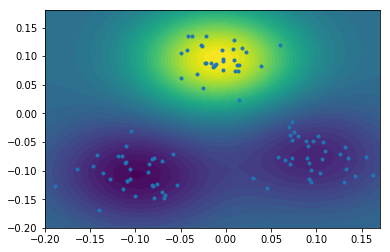

Eigenvalue: 21.4798756153


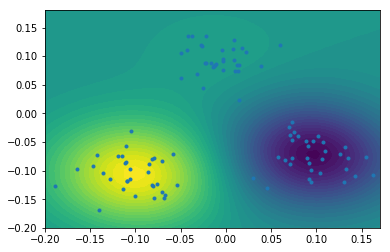

Eigenvalue: 5.46995560289


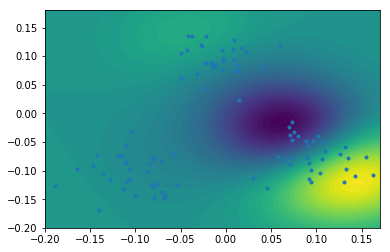

Eigenvalue: 5.11471622723


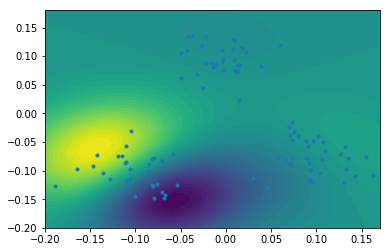

Eigenvalue: 3.72621282352


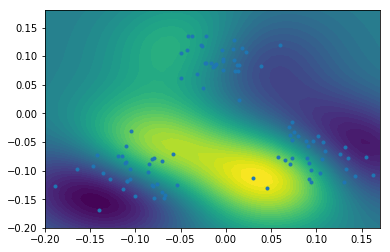

In [15]:
def plot_kpca_contour(fig, x_coords, y_coords, pca, eig=0, levels=50):
    """
    Plots contours for classification data.
    Args:
        fig (figure): figure to plot on
        x_coords (float iterable): x coordinate range
        y_coords (float iterable): y coordinate range
        pca (classifier): classifier object with 'pred' function
    """
    X_coords, Y_coords = np.meshgrid(x_coords, y_coords)
    Z_coords = np.zeros(X_coords.shape)
    for i in range(X_coords.shape[0]):
        for j in range(X_coords.shape[1]):
            x = np.asarray([[X_coords[i, j], Y_coords[i, j]]])
            Z_coords[i, j] = pca.transform(x, eig)[0][0]
    fig.contourf(X_coords, Y_coords, Z_coords, levels)

file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set10X.csv'
X = np.loadtxt(file_name_X, delimiter=',')

pca = KPCA(X, gamma=150)
eiglist = pca.fit()

x_coords = np.arange(-.2, .18, 0.01)
y_coords = np.arange(-.2, .19, 0.01)

for i in range(5):
    print('Eigenvalue:', eiglist[i][0])
    plt.plot(X[:,[0]], X[:,[1]], '.')
    plot_kpca_contour(plt, x_coords, y_coords, pca, i)
    plt.show()

Another application of kernel PCA is to separate nonlinear data. The example below of data from concentric circles can be separated using kernel PCA. The first principal component is graphed on the second plot.

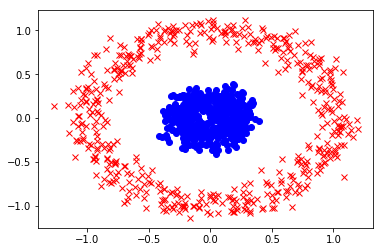

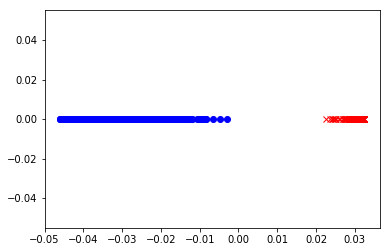

In [16]:
def plot_c_data(fig, X, t):
    """
    Plots classification data.
    Args:
        fig (figure): figure to plot on
        X (float ndarray): x values to plot
        t (float ndarray): corresponding classes to X
    """
    markers = ['rx', 'bo', 'g+', 'y^', 'p.']
    for i, c in enumerate(np.unique(t)):
        fig.plot(X[np.where(t==c)[0], [0]], X[np.where(t==c)[0], [1]], markers[i])


file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set11X.csv'
file_name_t = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set11t.csv'

X = np.loadtxt(file_name_X, delimiter=',')
t = np.loadtxt(file_name_t, delimiter=',').reshape(-1, 1)

x_coords = np.arange(-2, 2, 0.05)
y_coords = np.arange(-2, 2, 0.05)

pca = KPCA(X, gamma=5)
eiglist = pca.fit()

plot_c_data(plt, X, t)
plt.show()

first_comp = pca.eiglist[0][1].reshape(-1, 1)
plot_c_data(plt, np.hstack((first_comp, np.zeros((X.shape[0], 1)))), t)
plt.show()


TODO: <br>
Find examples of higher dimensional data <br>
Pre-image techniques <br>
Other continuous latent variable models <br>
